### Dataset Description

instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"E:\hour.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### we have to drop instant column


In [5]:
df.drop("instant",axis=1,inplace=True)

### 1)shape of the dataset

In [7]:
df.shape

(17379, 16)

## 2)information about dataset types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


## 3)dataset description 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [11]:
df.duplicated().sum()

0

### chaging the ddate column into datetime format

In [12]:
df["dteday"] = pd.to_datetime(df['dteday'])

### extract the day from the ddate columns and remove dteday column

In [18]:
df["Day"] = df["dteday"].dt.day

In [20]:
df.drop(columns =["dteday","Date"],inplace=True)

### checking numerical and categorical features

In [22]:
categorical_feature = [col for col in df.columns if df[col].dtypes =="O" ]
numerical_feature = [num for num in df.columns if df[num].dtypes!="O"]

print(f"we have {len(categorical_feature)} categorical feature:- {categorical_feature}")
print (f"we have {len(numerical_feature)} numerical feature :- {numerical_feature}")

we have 0 categorical feature:- []
we have 16 numerical feature :- ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Day']


#### observation
1) we don't have categorical features

## 4) Check for missing value

In [23]:
df.isnull().sum().sort_values(ascending =False)

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Day           0
dtype: int64

### observation
1) we don't have any missing value

2) we don't have any duplicated value in the dataset

### EDA using pandas profiling

In [24]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## 5)Univariate analysis

In [25]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


### a) Type of season and their percentage

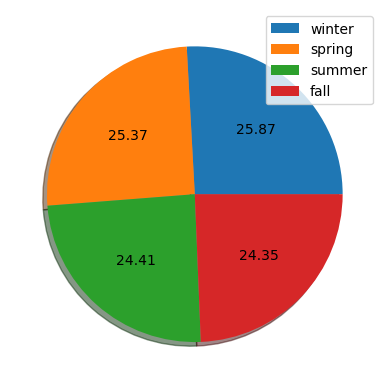

In [26]:
y = df["season"].value_counts()
mylabels =["winter","spring","summer", "fall"]

plt.pie(y,shadow = True,autopct='%.2f')
plt.legend(mylabels,loc='upper right')
plt.show() 

### b)how may days are holiday

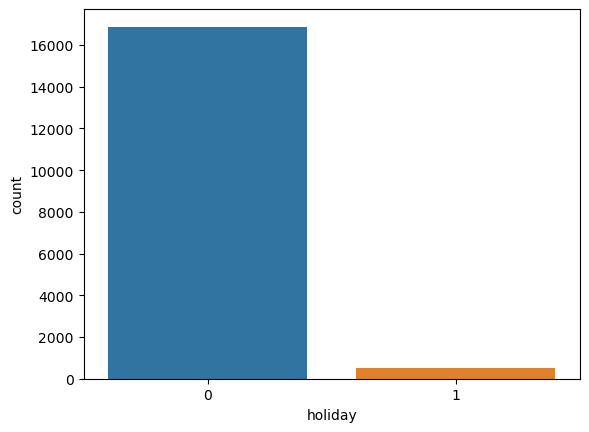

In [28]:
sns.countplot(df["holiday"])
plt.show()

#### observation
most of the data collected from non holiday

### c) distribution of weather situtation

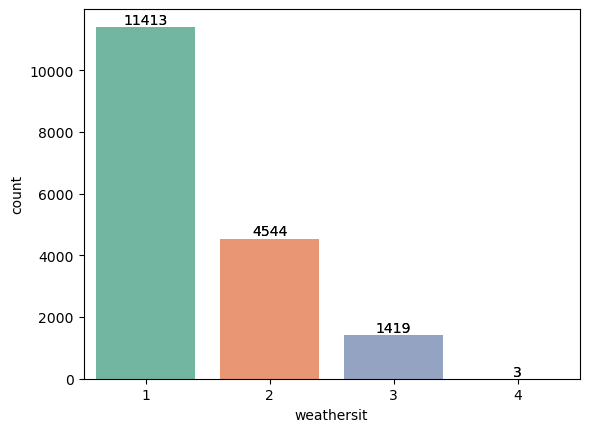

In [31]:
ax = sns.countplot(x='weathersit', data=df,palette = "Set2")
ax.bar_label(ax.containers[0])
plt.show()

#### mostly type of weather  is:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### d)variation of Normalized temperature

Text(0.5, 9.444444444444438, 'temprature(in celcius)')

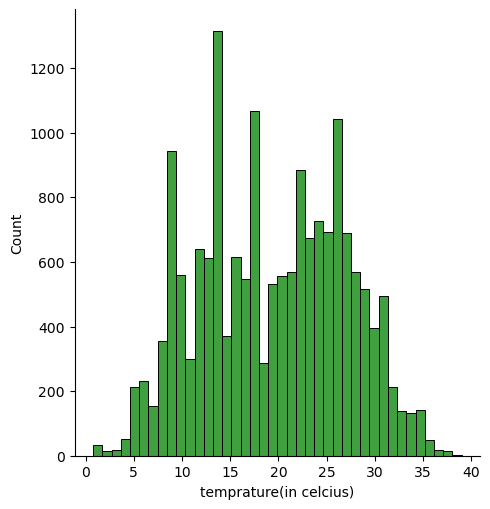

In [36]:
t_min = -8
t_max = +39
actual_temp = []
for i in range(len(df["temp"])):
    actual_temp.append(df["temp"][i]*(t_max-t_min+t_min))
sns.displot(actual_temp,color="g")
plt.xlabel("temprature(in celcius)")

#### observation
1) more then 1200 records we have when temprature is 14 degree celcius.

2) mostly temprature varition range (10-18) degree and (25-30) degree celcius.

### 6) bivariate analysis

#### variation of bike with month and the season

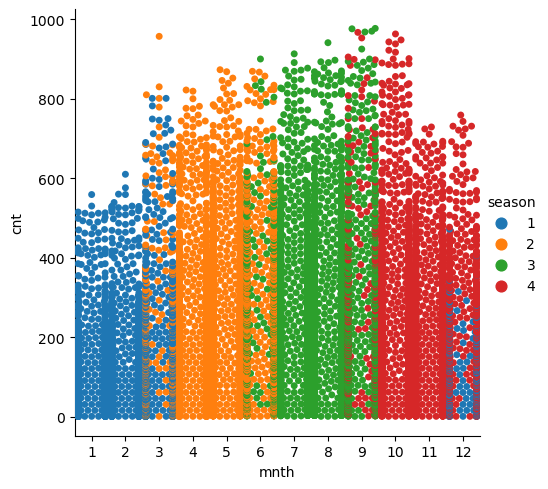

In [46]:
sns.catplot(x="mnth",y ="cnt",hue="season",data = df,kind="swarm")


### observation
1) max bike requirement in the fall season in months september and october.

### variation of vechicle with the weekday and weathersituation

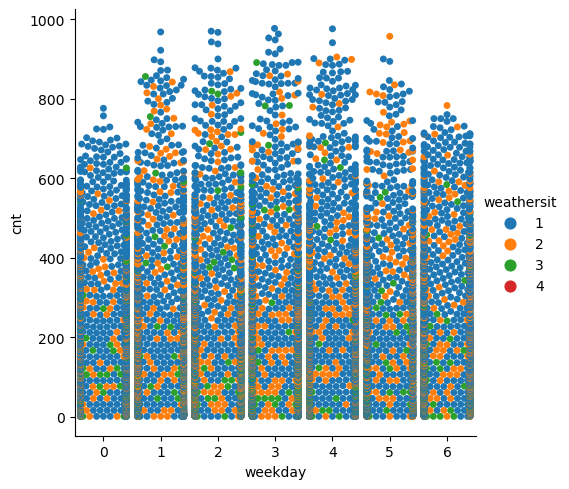

In [51]:
sns.catplot(x ="weekday",y ="cnt",hue = "weathersit",data = df,kind="swarm")

### observation
1) most vechile required when weather situtation is ::: Clear, Few clouds, Partly cloudy, Partly cloudy

### correlation beetween the features

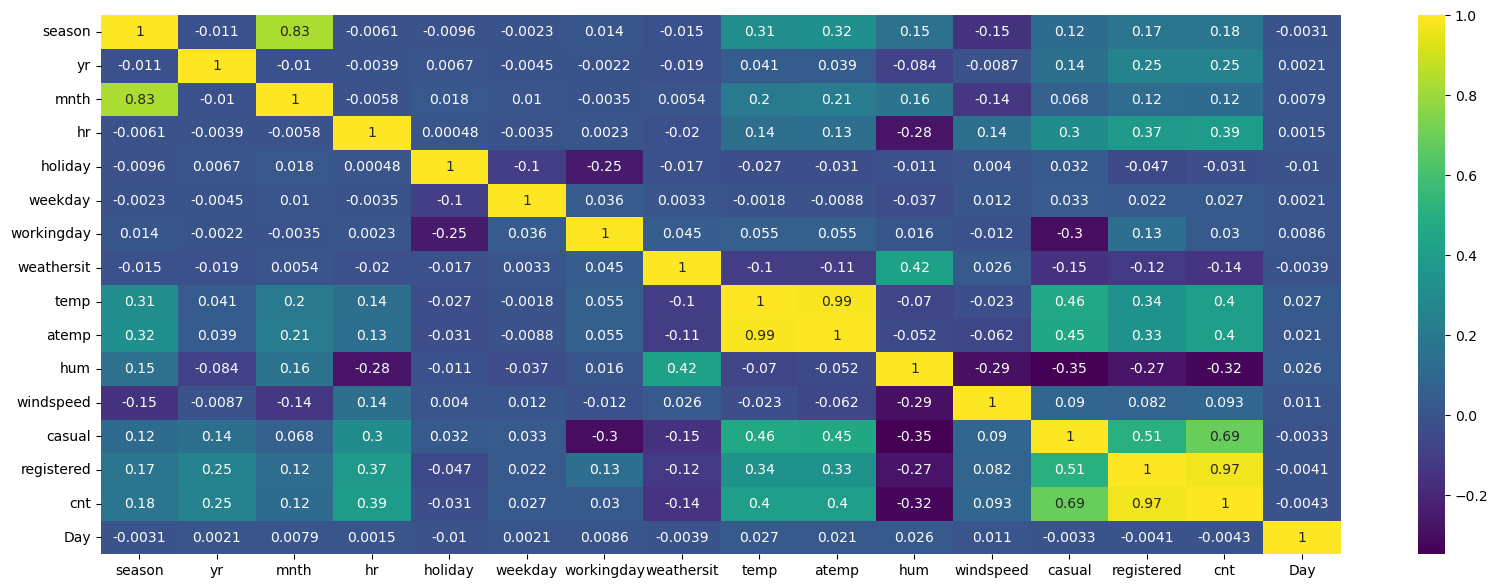

In [53]:
fig = plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap = "viridis")
plt.show()

#### observation
1) not any fature are corelated more than 70% 

### 6)check for outliers

<AxesSubplot:>

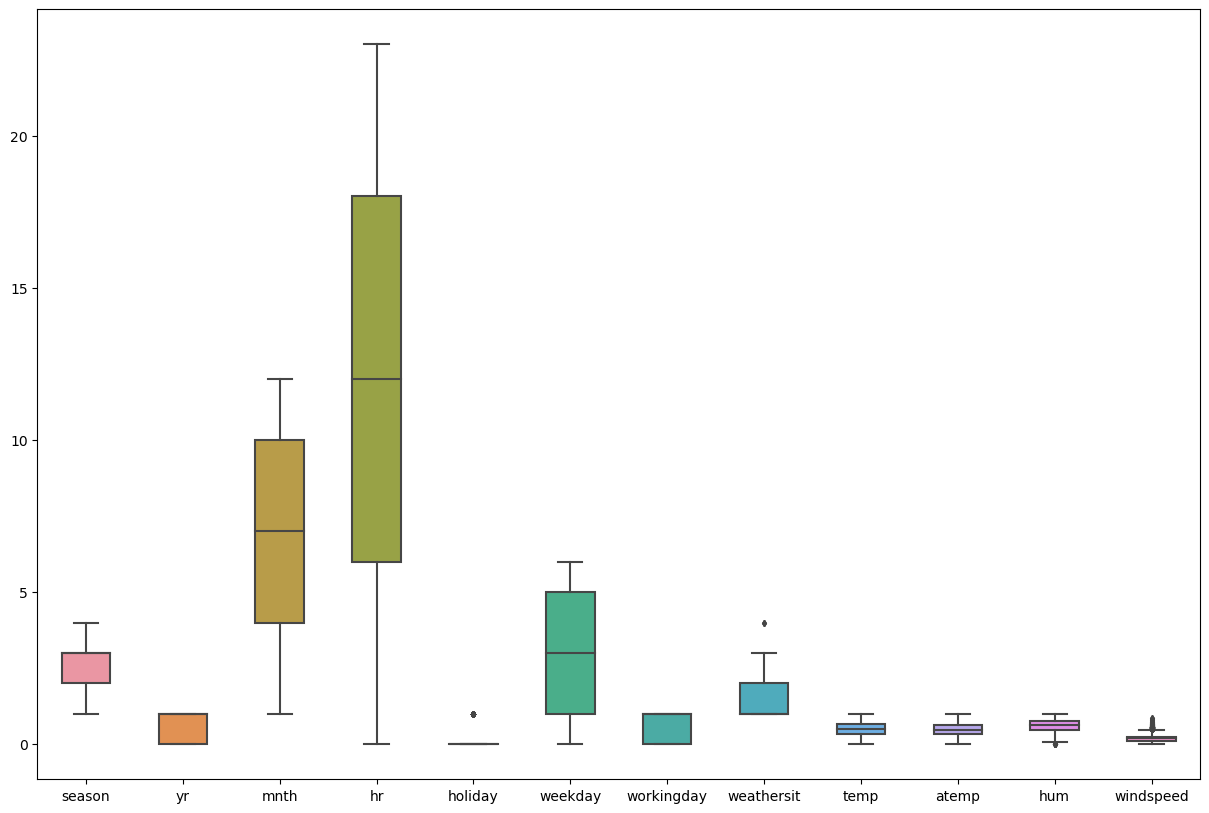

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df.iloc[:,:12] ,width= 0.5,ax=ax,  fliersize=3)

### observation
we don't have outliers in our feature

###  model training

In [59]:
def evaluate_reg(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns:  Mean_squared_error, Mean_absoulte_error,   Mean_root_error,R_squre
    '''
#     acc = score(true, predicted) # Calculate Accuracy
    Mean_squared_error = mean_squared_error(true,predicted)
    Mean_absoulte_error = mean_absolute_error(true,predicted)
    Mean_root_error = np.sqrt(mean_squared_error(true,predicted))
    R_squre = r2_score(true,predicted)                       
#     Adjusted_r2 = 1-(1-(R_squre))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    return Mean_squared_error,Mean_absoulte_error,Mean_root_error,R_squre

In [60]:
def evaluate_models(x, y, models):
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    scale = StandardScaler()
    x_train = scale.fit_transform(x_train)
    x_test = scale.transform(x_test)
    models_list = []
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Training set performance
        model_train_mean_squred_error,model_train_mean_absoulte_error,\
        model_train_mean_root_error,model_train_R_squre =evaluate_reg(y_train ,y_train_pred)
        Adjusted_r2_train = 1-(1-(model_train_R_squre))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1) 
        score_train = model.score(x_train,y_train)
        # Test set performance
        model_test_mean_squred_error,model_test_mean_absoulte_error,\
        model_test_mean_root_error,model_test_R_squre=evaluate_reg(y_test ,y_test_pred)
        Adjusted_r2_test = 1-(1-(model_test_R_squre))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
        score_test = model.score(x_test,y_test)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Training_Score: {:.4f}".format(score_train))
        print('-mean_squred_error : {:.4f}'.format(model_train_mean_squred_error)) 
        print('- mean_absoulte_error: {:.4f}'.format(model_train_mean_absoulte_error))
        print('- mean_root_error: {:.4f}'.format(model_train_mean_root_error))
        print('- R_squre: {:.4f}'.format(model_train_R_squre))
        print('- Adjusted_rsqure: {:.4f}'.format(Adjusted_r2_train))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Testing_score: {:.4f}".format(score_test))
        print('-mean_squred_error : {:.4f}'.format(model_test_mean_squred_error)) 
        print('- mean_absoulte_error: {:.4f}'.format(model_test_mean_absoulte_error))
        print('- mean_root_error: {:.4f}'.format(model_test_mean_root_error))
        print('- R_squre: {:.4f}'.format(model_test_R_squre))
        print('- Adjusted_rsqure: {:.4f}'.format(Adjusted_r2_test))

        print('='*35)
        print('\n')


In [61]:
# Dictionary which contains models for experiment
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

#### Evaluate Model on Different experiments

In [62]:
x= df.drop('cnt', axis=1)
y = df['cnt']

In [63]:
evaluate_models(x,y,models)

Random Forest Regressor
Model performance for Training set
- Training_Score: 1.0000
-mean_squred_error : 1.2515
- mean_absoulte_error: 0.3849
- mean_root_error: 1.1187
- R_squre: 1.0000
- Adjusted_rsqure: 1.0000
----------------------------------
Model performance for Test set
- Testing_score: 0.9998
-mean_squred_error : 7.1953
- mean_absoulte_error: 0.9482
- mean_root_error: 2.6824
- R_squre: 0.9998
- Adjusted_rsqure: 0.9998


Decision Tree Regressor
Model performance for Training set
- Training_Score: 1.0000
-mean_squred_error : 0.0000
- mean_absoulte_error: 0.0000
- mean_root_error: 0.0000
- R_squre: 1.0000
- Adjusted_rsqure: 1.0000
----------------------------------
Model performance for Test set
- Testing_score: 0.9992
-mean_squred_error : 25.6312
- mean_absoulte_error: 2.2808
- mean_root_error: 5.0627
- R_squre: 0.9992
- Adjusted_rsqure: 0.9992


Gradient Boosting
Model performance for Training set
- Training_Score: 0.9993
-mean_squred_error : 22.7083
- mean_absoulte_error: 3.083

### we select randonforest regressor for our model training b/c it gives 99.8% acuracy